# Introduction
 In this file, we will

1. Explore and compare complexities of different algorithms based on the [data](https://github.com/miranska/quant_str_comp/blob/main/explore_gate_count/Qubit%20count%20and%20time%20it%20takes%20to%20generate%20circuit%20(1)%20(1).ipynb) gathered by Mushahid.
2. We will also add the data for EP-PQM

$N$ is the number of possible states that can be represented by $n$ qubits, i.e., $N = 2^n$.

In [10]:
N = lambda n : 2 ** n

The number of observations/rows in the dataset is denoted by $r$. In the case of algorithms for dense statevectors we will conservatively assume that $r = N = 2^n$.

Let's combine the stats in one data structure.

* `order_of_depth` is the order of depth of the generated circuit;
* `order_of_runtime` is the order of time needed to construct the circuit on a classical computer;
* `order_of_qubits` is the order of the number of qubits needed to construct the circuit on a quantum computer.

In [29]:
import math
stats = [
    {'id': "Zhang'21-sequential",
     'legend': "Zhang'21 Sequential",
     'url': 'https://arxiv.org/pdf/2102.07533.pdf',
     'title': "Low-depth Quantum State Preparation",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : n ** 2,
     'order_of_runtime': lambda n : N(n) ** 2,
     'order_of_qubits': lambda n : n
    },
    {'id': "Zhang'21-parallel-1",
     'legend': "Zhang'21 Parallel-1",
     'url': 'https://arxiv.org/pdf/2102.07533.pdf',
     'title': "Low-depth Quantum State Preparation",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : n ** 2,
     'order_of_runtime': lambda n : n ** 2,
     'order_of_qubits': lambda n : N(n) ** 2
    },
    {'id': "Zhang'21-parallel-2",
     'legend': "Zhang'21 Parallel-2",
     'url': 'https://arxiv.org/pdf/2102.07533.pdf',
     'title': "Low-depth Quantum State Preparation",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : n ** 2,
     'order_of_runtime': lambda n : N(n) ** 1.52,
     'order_of_qubits': lambda n : N(n)
    },
    {'id': "Zhang'22",  # TODO: This seems to be for dense version. What about sparse version?
     'legend': "Zhang'22-dense?",
     'url': 'https://arxiv.org/pdf/2201.11495.pdf',
     'title': "Quantum State Preparation with Optimal Circuit Depth: Implementations and Applications",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : n,
     'order_of_runtime': lambda n : N(n),
     'order_of_qubits': lambda n : N(n)
    },
    {
     'id': "Zhang'22-sparse",
     'legend': "Zhang'22-sparse",
     'url': 'https://arxiv.org/pdf/2201.11495.pdf',
     'title': "Quantum State Preparation with Optimal Circuit Depth: Implementations and Applications",
     'state_vector_type': 'sparse',
     'order_of_depth': lambda n, r : math.log(n * r),
     'order_of_runtime': lambda n, r : math.log(n * r),
     'order_of_qubits': lambda n, r : n + (n * r * math.log(r))
    },
    
######################################### Run time unclear #################################################### 
#     {'id': "Sun'21",  # TODO: This seems to be for dense version. What about sparse version?
#      'legend': "Sun'21",
#      'url': 'https://arxiv.org/abs/2108.06150',
#      'title': "Asymptotically Optimal Circuit Depth for Quantum State Preparation and General Unitary Synthesis",
#      'state_vector_type': 'dense',
#      'order_of_depth': lambda n : (2 ** n / n) + n, # TODO: this looks different from the paper's abstract
#      'order_of_runtime': lambda n : N(n),
#      'order_of_qubits': lambda n : N(n) #this might be n - talk to professor about this
#     },

#     {'id': "Sun'21-sparse", 
#      'legend': "Sun'21-sparse",
#      'url': 'https://arxiv.org/abs/2108.06150',
#      'title': "Asymptotically Optimal Circuit Depth for Quantum State Preparation and General Unitary Synthesis",
#      'state_vector_type': 'sparse',
#      'order_of_depth': lambda n, r : (n * math.log(n * r)) + ((r * math.log(r) * ( n ** 2)) / n),
#      'order_of_runtime': lambda n, r : N(n),
#      'order_of_qubits': lambda n, r : n # - talk to professor about this
#     },
################################################################################################################
    
    {'id': "Araujo'20",
     'legend': "Araujo'20",
     'url': 'https://arxiv.org/abs/2008.01511',
     'title': "A divide-and-conquer algorithm for quantum state preparation",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : math.log(N(n)) ** 2, 
     'order_of_runtime': lambda n : N(n),
     'order_of_qubits': lambda n : N(n)
    },
    {'id': "Möttönen'05, Plesch'11",
     'legend': "Unitary",
     'url': 'https://arxiv.org/pdf/2102.07533.pdf',
     'title': "Unitary [Möttönen'05, Plesch'11]",
     'note': "Taken from Table I of https://arxiv.org/pdf/2102.07533.pdf , based on references [4,5]",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : N(n),
     'order_of_runtime': lambda n : N(n),
     'order_of_qubits': lambda n : n
    },
    {'id': "Shende'06",
     'legend': "Shende'06",
     'url': 'https://arxiv.org/pdf/quant-ph/0406176.pdf',
     'title': "Synthesis of Quantum Logic Circuits",
     'note': "Used in QisKit",
     'state_vector_type': 'dense',
     'order_of_depth': lambda n : N(n),  # specifically, $2 ^ {n+1} - 2n$
     'order_of_runtime': lambda n : 1,  # TODO: find out
     'order_of_qubits': lambda n : n
    },
    # TODO: for EP-PQM, add the case with auxillary qubits for MCC gates.
    #       If this particular point lands on the boundary, we can do further
    #       exploration for AUX versions of MCC, see `CNOT gatex count.ipynb` for details
    {'id': "Khan'22-w/o-aux",
     'legend': "Khan'22 w/o Aux",
     'url': 'https://arxiv.org/pdf/2201.07265.pdf',
     'title': "EP-PQM: Efficient Parametric Probabilistic Quantum Memory with Fewer Qubits and Gates",
     'state_vector_type': 'sparse',
     'order_of_depth': lambda n, r : n * r,
     'order_of_runtime': lambda n, r : n * r,
     'order_of_qubits': lambda n, r : n
    },
    
    #TODO: Mushahid.,, look at more papers in the paper for sparse
    # {'id': "Malvetti'21-dense",  # TODO: add dense and sparse, see Section 5 for analysis
    #  'legend': "Malvetti'21",
    #  'url': 'https://quantum-journal.org/papers/q-2021-03-15-412/pdf/',
    #  'title': "Quantum Circuits for Sparse Isometries",
    #  'order_of_depth': lambda n :
    #  'order_of_runtime': lambda n : N(2*n) * (N(n) + N(n/2))
    #  'order_of_qubits': lambda n :
    # }
    
    {'id': "Cvo_qram",
     'legend': "Double_sparse_state_prep",
     'url': 'https://arxiv.org/pdf/2108.13527.pdf',
     'title': "Double sparse quantum state preparation",
     'state_vector_type': 'sparse',
     'number_of_cnot_gates': lambda n, r: (8 * r - 4) - n,
     'order_of_runtime': lambda n, r : N(n) * math.log(N(n) + n * N(n)),
     'order_of_qubits': lambda n, r : n  
    },
    
    {
    'id': "Cv_qram",
     'legend': "Cv_qram",
     'url': 'https://arxiv.org/abs/2011.07977',
     'title': "Circuit-based quantum random access memory for classical data with continuous amplitudes",
     'state_vector_type': 'sparse',
     'number_of_cnot_gates': lambda n, r: n * N(n),
     'order_of_runtime': lambda n, r : N(n) * n,
     'order_of_qubits': lambda n, r : n  
    },
    
    {
      'id': "Efficient_algorithm_sparse_quantum_state_preparation",
     'legend': "Efficient_algorithm_sparse_quantum_state_preparation",
     'url': 'https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9586240',
     'title': "An Efficient Algorithm for Sparse Quantum State Preparation",
     'state_vector_type': 'sparse',
     'number_of_cnot_gates': lambda n, r: r * n,
     'order_of_runtime': lambda n, r : r ** 2 * math.log(r) * n,
     'order_of_qubits': lambda n, r : n  
    },
       
    {
      'id': "Efficient_deterministic_prep_quantum_states_using_decision_diagrams",
     'legend': "Efficient_deterministic_prep_quantum_states_using_decision_diagrams",
     'url': 'https://arxiv.org/pdf/2206.08588.pdf',
     'title': "Efficient deterministic preparation of quantum states using decision diagrams",
     'state_vector_type': 'sparse',
     'number_of_cnot_gates': lambda n, r: n,
     'order_of_runtime': lambda n, r : n,
     'order_of_qubits': lambda n, r : n  
    }                                               
]


From `CNOT gatex count.ipynb`: "See Fig.4.10 of Nielsen and Chuang, 2010 for example of V-chain. Notice that they require $n-1$ ancilla qubits, $2(n-1)$ Toffoli gates and $1$ CNOT gate. In Qiskit's code this is further reduced to $n-2$ ancilla gubits and only  $2(n-1)$ simiplified Toffoli gates (`rccx`) which are unraveled to 3 CNOT gates each (see example above, [docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RCCXGate.html) and [code](https://github.com/Qiskit/qiskit-terra/blob/5b166c05182ca3c062106d08a9610ac246aa3e83/qiskit/circuit/library/standard_gates/x.py#L1198-L1202) for details).
"


Let's plot all three variables

In [30]:
import matplotlib.pyplot as plt

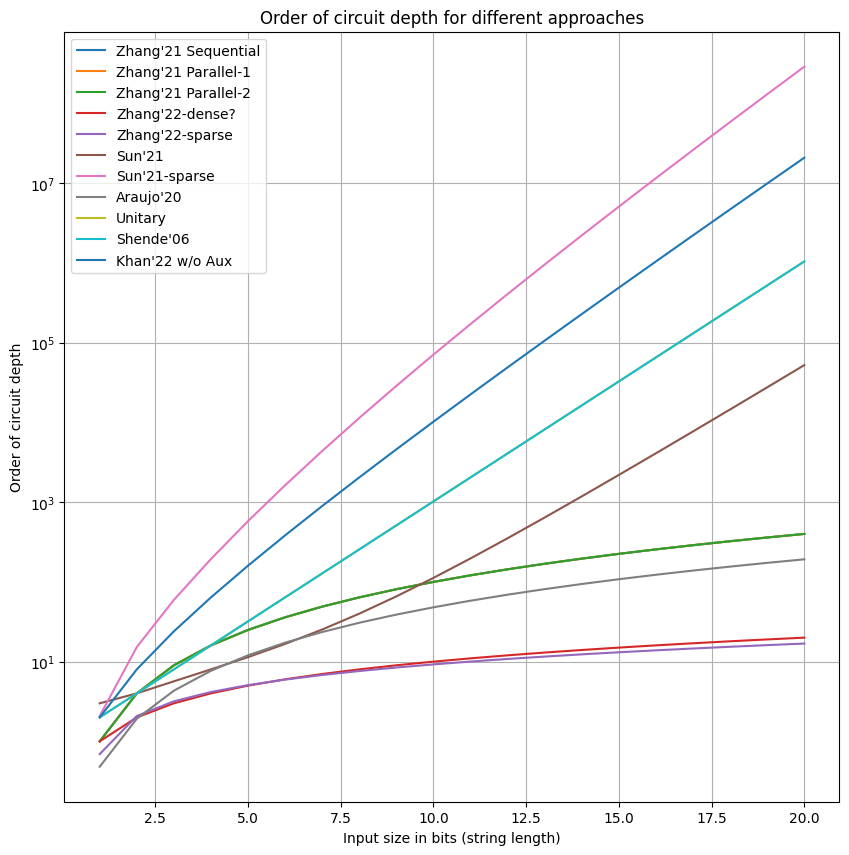

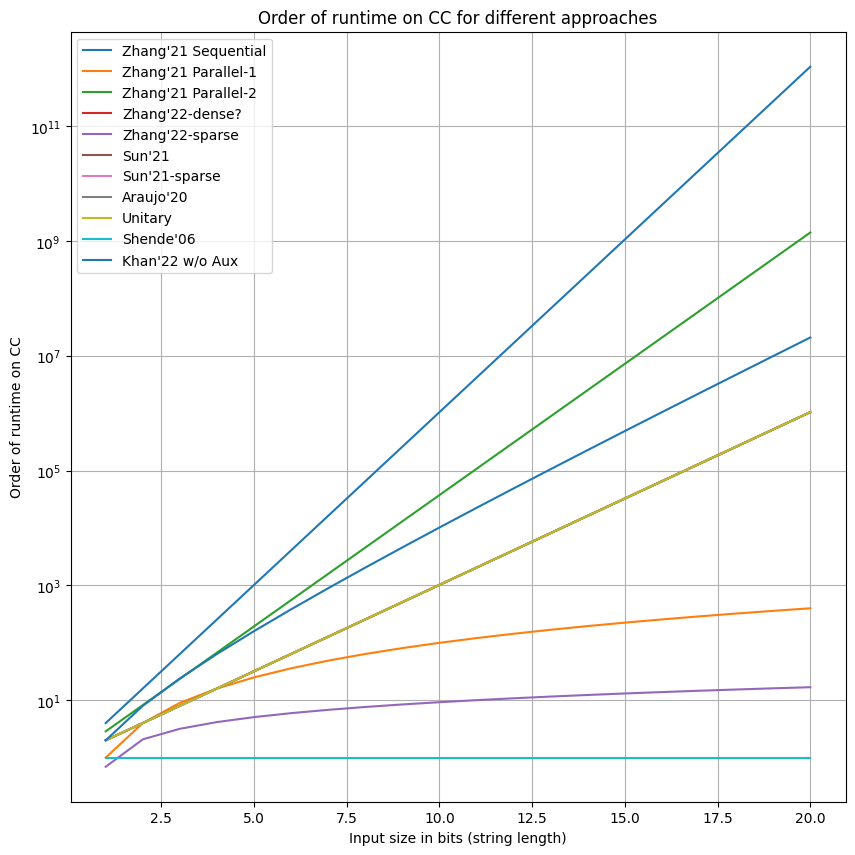

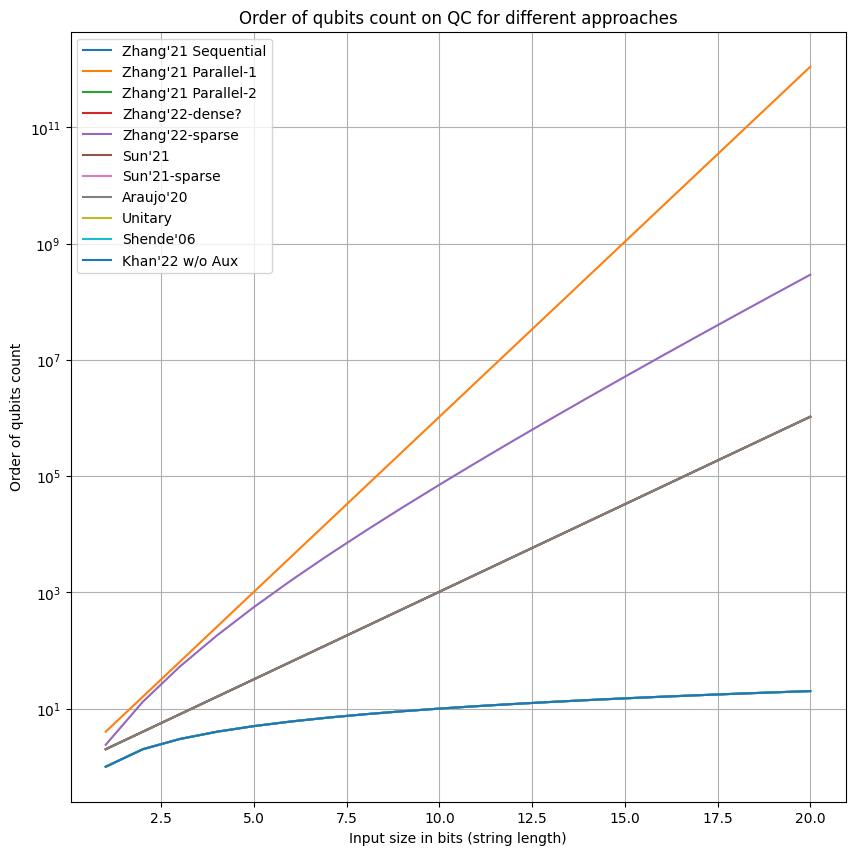

In [31]:
graphs = [
    {'field': 'order_of_depth',
     'ylabel': 'Order of circuit depth',
     'title': 'Order of circuit depth for different approaches'
     },
    {'field': 'order_of_runtime',
     'ylabel': 'Order of runtime on CC',
     'title': 'Order of runtime on CC for different approaches'
     },
    {'field': 'order_of_qubits',
     'ylabel': 'Order of qubits count',
     'title': 'Order of qubits count on QC for different approaches'
     },
]
for graph in graphs:
    plt.figure(figsize=(10, 10))
    n_values = range(1, 21)
    for alg in stats:
        x = n_values
        y = []
        for n in n_values:
            if alg['state_vector_type'] == 'sparse':
                r = N(n)  # assume that we have all the states populated (which is a very conservative assumption)
                y.append(alg[graph['field']](n, r))
            else:
                y.append(alg[graph['field']](n))

        plt.plot(x, y, label=alg['legend'])

    plt.xlabel('Input size in bits (string length)')
    plt.ylabel(graph['ylabel'])
    plt.title(graph['title'])
    plt.yscale('log')
    plt.grid()
    plt.legend()
    plt.show()


Individual scatter plot for dense state vectors

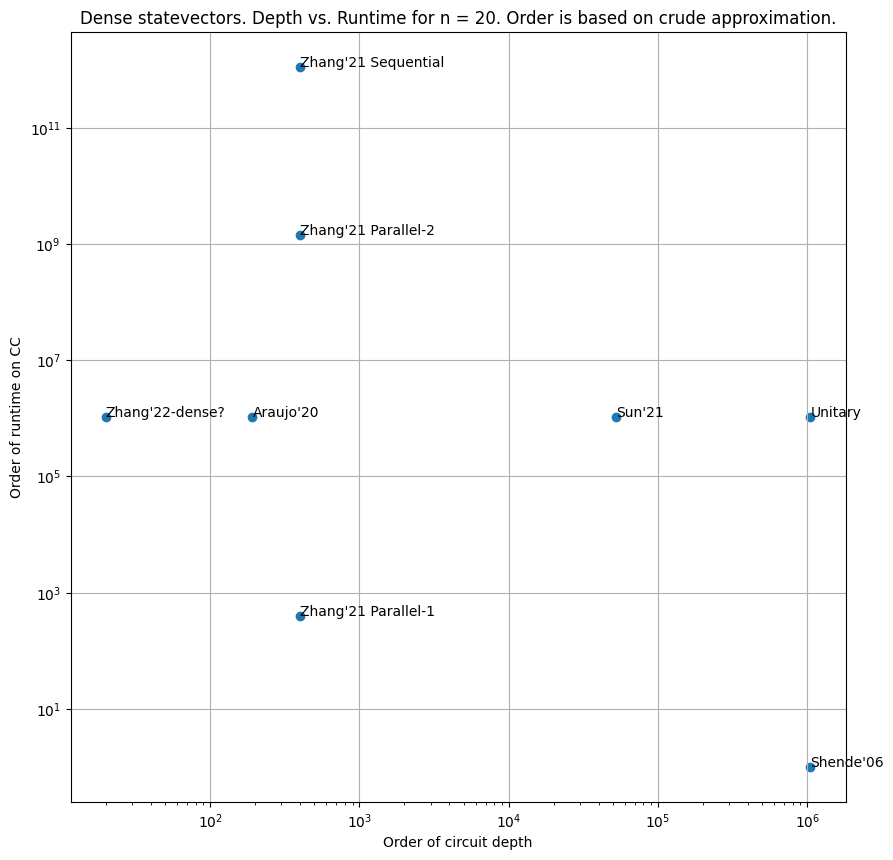

In [27]:
n = 20

x = []
y = []
annotation = []
for alg in stats:
    if alg['state_vector_type'] == 'dense':
        x.append(alg['order_of_depth'](n))
        y.append(alg['order_of_runtime'](n))
        annotation.append(alg['legend'])

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Order of circuit depth')
plt.ylabel('Order of runtime on CC')
plt.title(f'Dense statevectors. Depth vs. Runtime for n = {n}. Order is based on crude approximation.')
plt.grid()

ax.scatter(x, y)
for i, txt in enumerate(annotation):
    ax.annotate(txt, (x[i], y[i]))

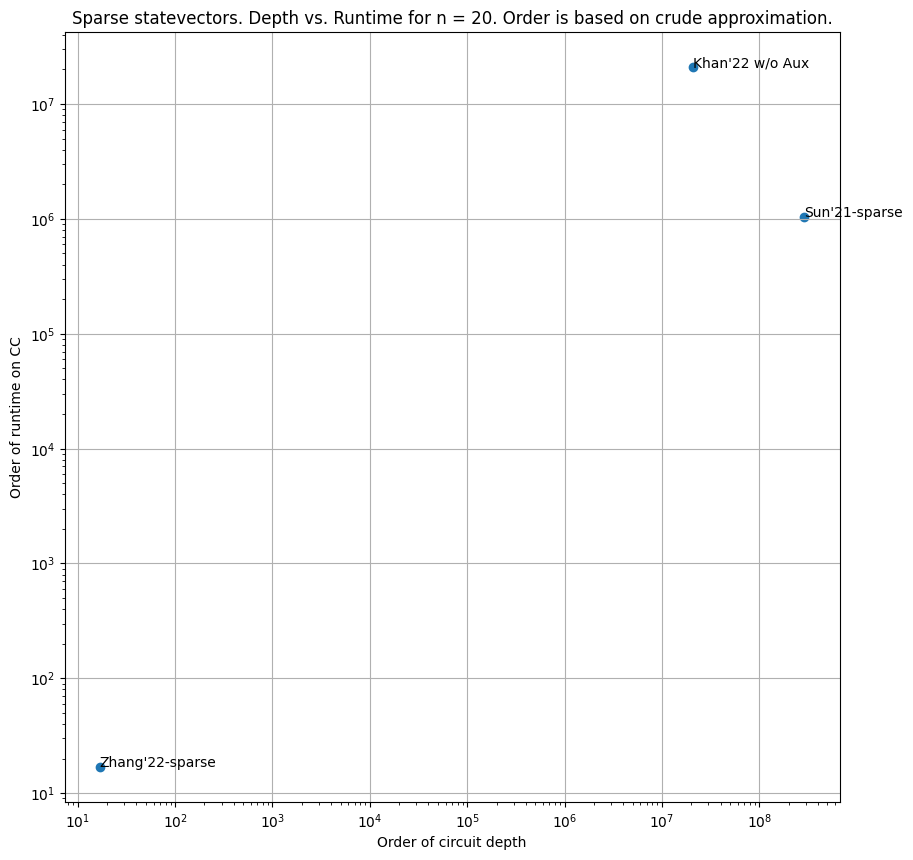

In [32]:
n = 20

x = []
y = []
annotation = []
for alg in stats:
    if alg['state_vector_type'] == 'sparse':
        x.append(alg['order_of_depth'](n, r))
        y.append(alg['order_of_runtime'](n, r))
        annotation.append(alg['legend'])

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Order of circuit depth')
plt.ylabel('Order of runtime on CC')
plt.title(f'Sparse statevectors. Depth vs. Runtime for n = {n}. Order is based on crude approximation.')
plt.grid()

ax.scatter(x, y)
for i, txt in enumerate(annotation):
    ax.annotate(txt, (x[i], y[i]))

TODO: for sparse algorithms add the third dimension ($r$).

For simple approximation, let's use seaborn scatterplot

In [36]:
# prep the dataframe for pairwise plot
import pandas as pd
n = 20
df_order = []
for alg in stats:
    if alg['state_vector_type'] == 'dense':
        df_order.append({
            'algorithm': alg['legend'],
            'order_of_depth': alg['order_of_depth'](n),
            'order_of_runtime': alg['order_of_runtime'](n),
            'order_of_qubits': alg['order_of_qubits'](n),
        })

df_order = pd.DataFrame(df_order)
df_order

,algorithm,order_of_depth,order_of_runtime,order_of_qubits
0,Zhang'21 Sequential,4.000000e+02,1.099512e+12,20
1,Zhang'21 Parallel-1,4.000000e+02,4.000000e+02,1099511627776
2,Zhang'21 Parallel-2,4.000000e+02,1.416811e+09,1048576
3,Zhang'22-dense?,2.000000e+01,1.048576e+06,1048576
4,Sun'21,5.244880e+04,1.048576e+06,1048576
5,Araujo'20,1.921812e+02,1.048576e+06,1048576
6,Unitary,1.048576e+06,1.048576e+06,20
7,Shende'06,1.048576e+06,1.000000e+00,20


In [35]:
# prep the dataframe for pairwise plot
import pandas as pd
n = 20
df_order_sparse = []
for alg in stats:
    if alg['state_vector_type'] == 'sparse':
        df_order_sparse.append({
            'algorithm': alg['legend'],
            'order_of_depth': alg['order_of_depth'](n, r),
            'order_of_runtime': alg['order_of_runtime'](n, r),
            'order_of_qubits': alg['order_of_qubits'](n, r),
        })

df_order_sparse = pd.DataFrame(df_order_sparse)
df_order_sparse

,algorithm,order_of_depth,order_of_runtime,order_of_qubits
0,Zhang'22-sparse,1.685868e+01,1.685868e+01,2.907270e+08
1,Sun'21-sparse,2.907273e+08,1.048576e+06,2.000000e+01
2,Khan'22 w/o Aux,2.097152e+07,2.097152e+07,2.000000e+01


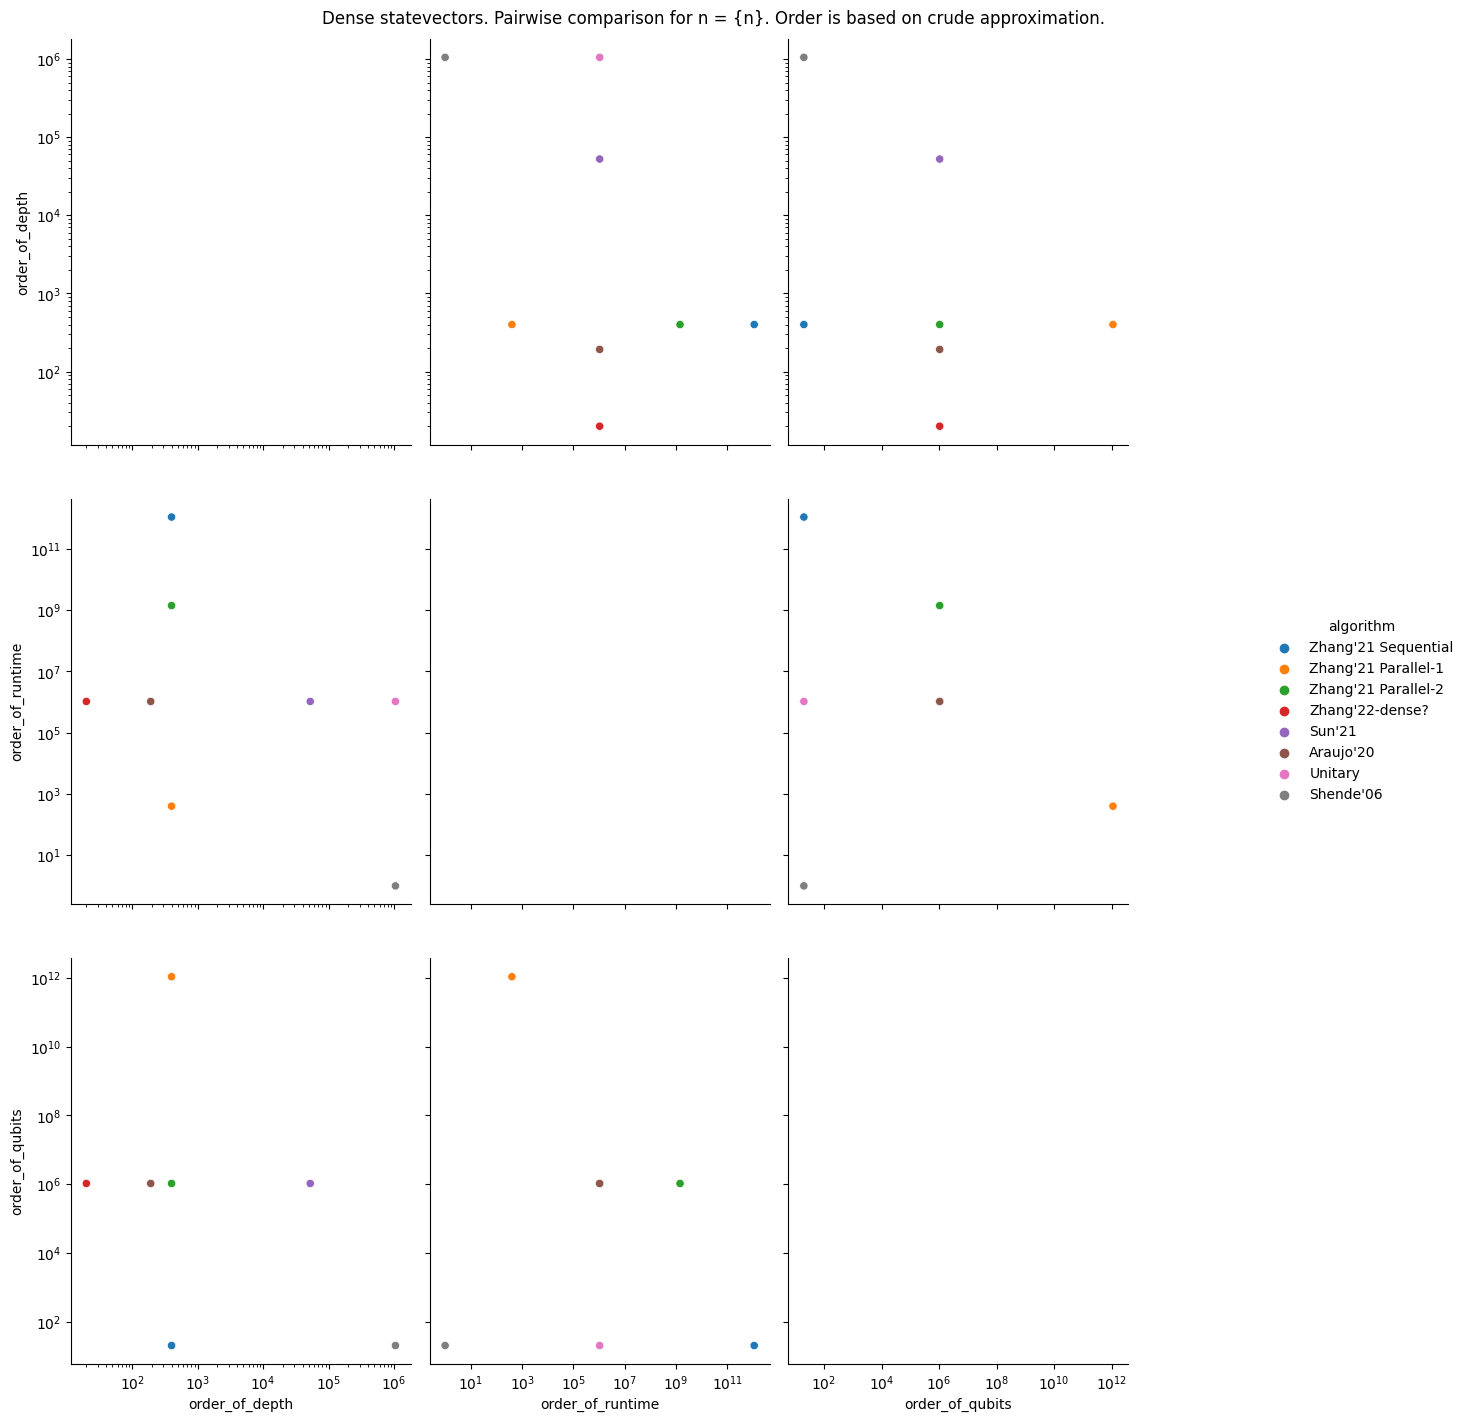

In [37]:
import seaborn as sns
pp = sns.pairplot(df_order, hue='algorithm')
pp.fig.suptitle('Dense statevectors. Pairwise comparison for n = {n}. Order is based on crude approximation.')
pp.fig.set_size_inches(15,15)
for ax in pp.axes.flat:
    ax.set(xscale="log")
    ax.set(yscale="log")


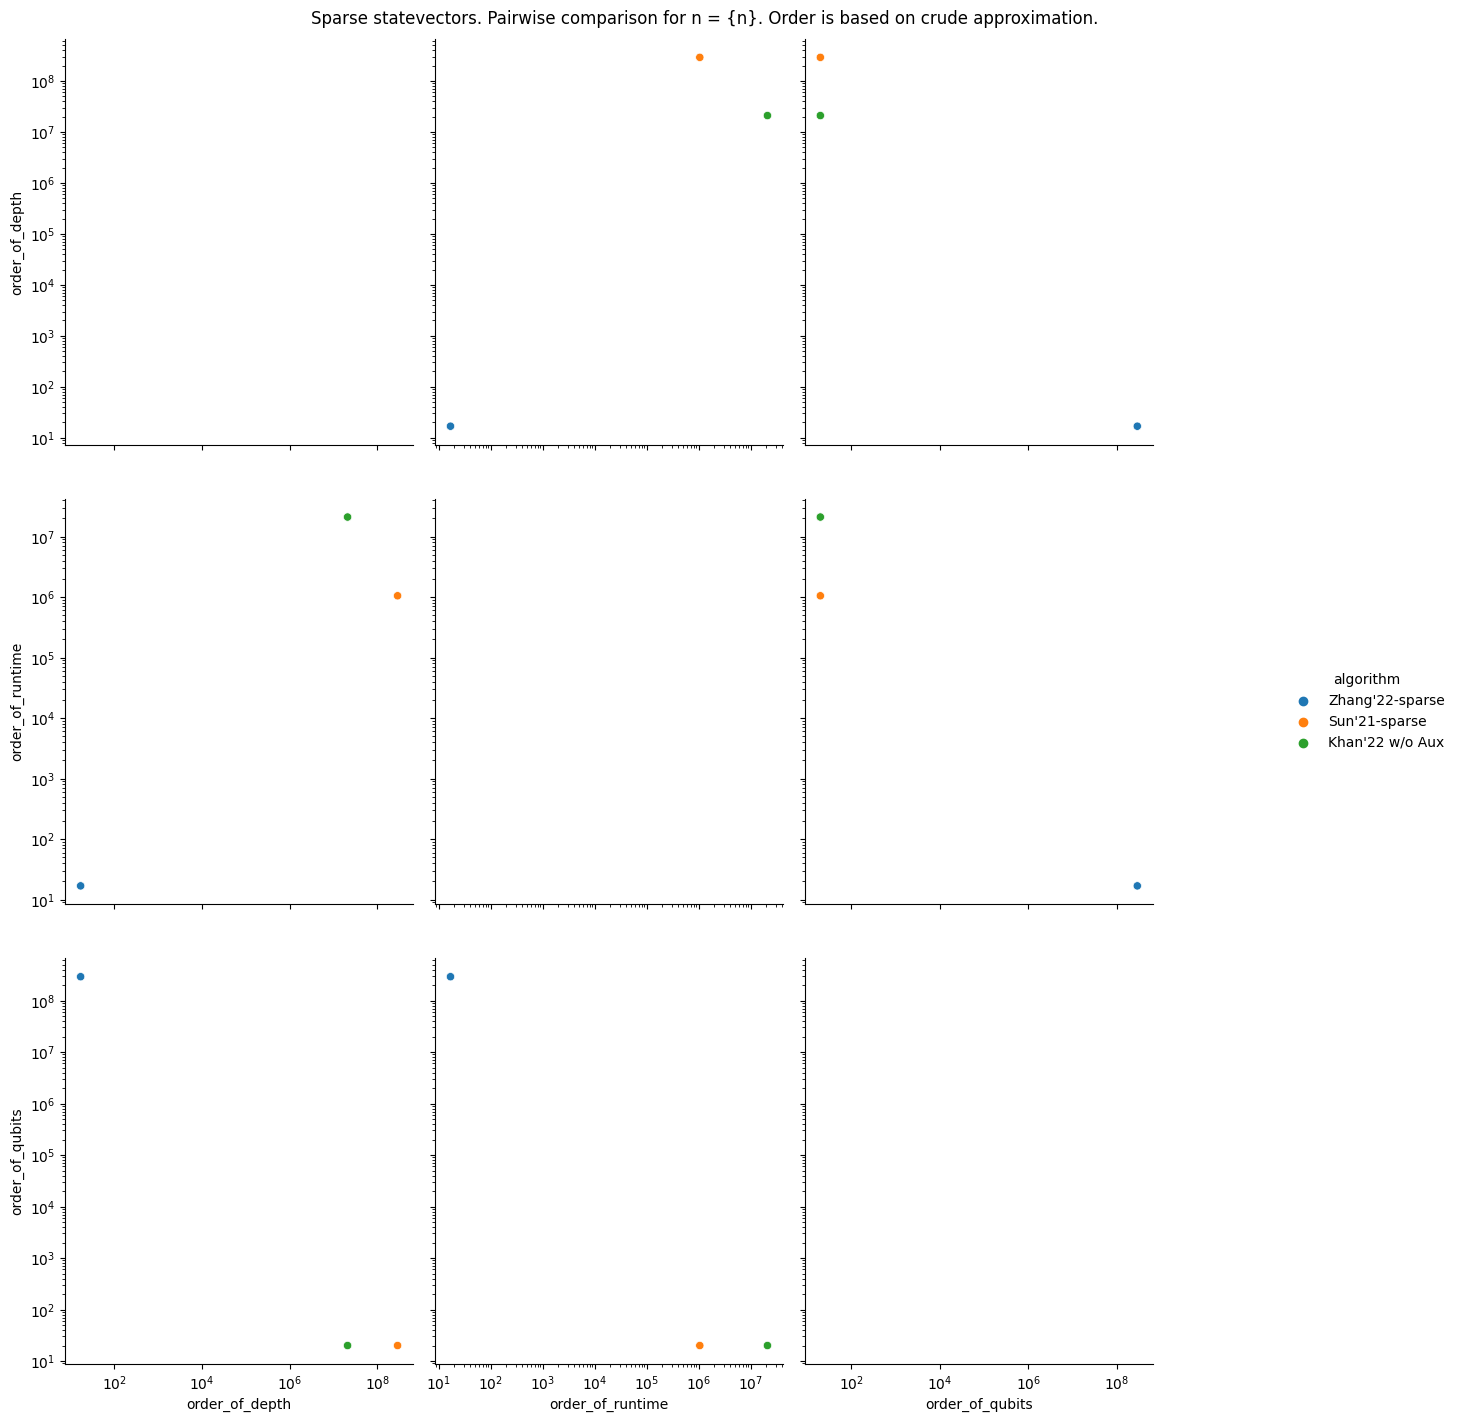

In [38]:
import seaborn as sns
pp = sns.pairplot(df_order_sparse, hue='algorithm')
pp.fig.suptitle('Sparse statevectors. Pairwise comparison for n = {n}. Order is based on crude approximation.')
pp.fig.set_size_inches(15,15)
for ax in pp.axes.flat:
    ax.set(xscale="log")
    ax.set(yscale="log")


Let's compute Pareto non-dominant set (skyline) for one of the 2-D cases. To compute the skyline, we will use `paretoset` [library](https://github.com/tommyod/paretoset). Here is a good video [tutorial](https://www.youtube.com/watch?v=rkSmkkzM3ao) made by the author of `paretoset`.


In [40]:
from paretoset import paretoset

mask = paretoset(df_order[['order_of_depth', 'order_of_runtime']],
          sense=[min, min])
my_skyline = df_order[mask].sort_values(by=['order_of_depth', 'order_of_runtime'])


ModuleNotFoundError: No module named 'paretoset'

Downloading/unpacking paretoset
  Cannot fetch index base URL http://pypi.python.org/simple/
  Could not find any downloads that satisfy the requirement paretoset
No distributions at all found for paretoset
Storing complete log in /Users/mushahid/.pip/pip.log
Note: you may need to restart the kernel to use updated packages.


In [39]:
from paretoset import paretoset

mask = paretoset(df_order_sparse[['order_of_depth', 'order_of_runtime']],
          sense=[min, min])
my_skyline = df_order[mask].sort_values(by=['order_of_depth', 'order_of_runtime'])


ModuleNotFoundError: No module named 'paretoset'

In [9]:
my_skyline

,algorithm,order_of_depth,order_of_runtime,order_of_qubits
3,Zhang'22-dense?,20.0,1048576.0,1048576
1,Zhang'21 Parallel-1,400.0,400.0,1099511627776
7,Shende'06,1048576.0,1.0,20


Let's plot the skyline on the scatterplot:

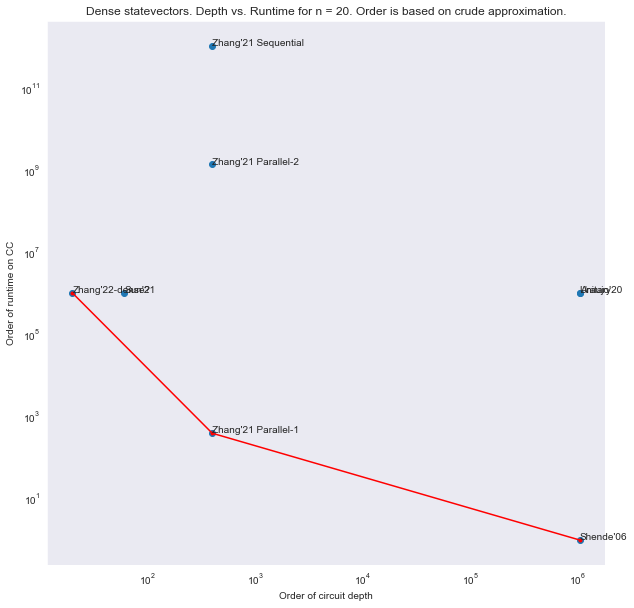

In [10]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Order of circuit depth')
plt.ylabel('Order of runtime on CC')
plt.title(f'Dense statevectors. Depth vs. Runtime for n = {n}. Order is based on crude approximation.')
plt.grid()

ax.scatter(x, y)
ax.plot(list(my_skyline.order_of_depth), list(my_skyline.order_of_runtime), '.r-')
for i, txt in enumerate(annotation):
    ax.annotate(txt, (x[i], y[i]))


Let's check how the skyline looks like for all three dimensions:

In [11]:
mask = paretoset(df_order[['order_of_depth', 'order_of_runtime', 'order_of_qubits']],
          sense=[min, min, min])
df_order[mask].sort_values(by=['order_of_depth', 'order_of_runtime', 'order_of_qubits'])


,algorithm,order_of_depth,order_of_runtime,order_of_qubits
3,Zhang'22-dense?,20.0,1.048576e+06,1048576
1,Zhang'21 Parallel-1,400.0,4.000000e+02,1099511627776
0,Zhang'21 Sequential,400.0,1.099512e+12,20
7,Shende'06,1048576.0,1.000000e+00,20


We get an extra observation. We have to be careful: `Shende'06` `order_of_runtime = 1` is just a dummy value. Once the value is updated, the border will change.


TODO: let's repeat the analysis for sparse algorithms. Let's see where EP-PQM lands. :-)
